# Importação de bibliotecas

In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [71]:
sns.set_style('darkgrid')

# Importação de dados (df)

In [72]:
df = pd.read_csv(os.path.abspath('../dados/insurance.csv'))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Análises estatística

## Análise exploratória

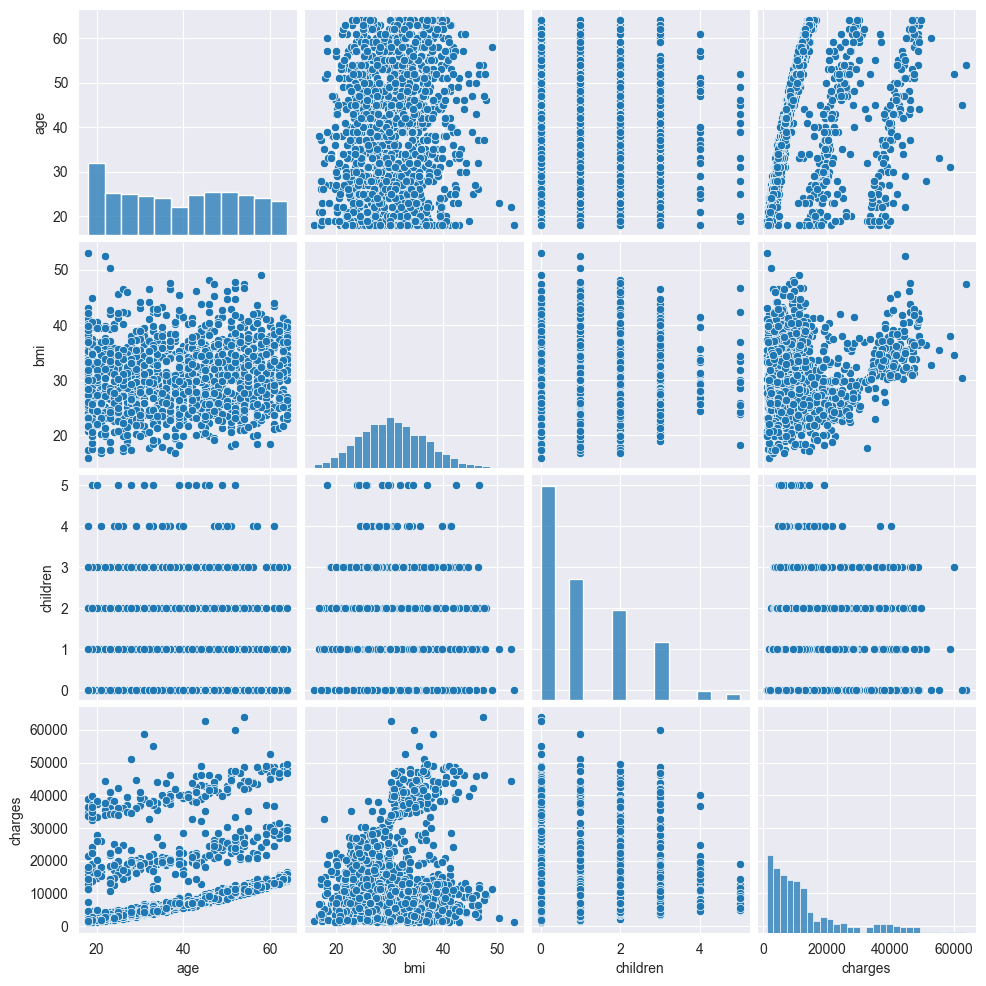

In [73]:
sns.pairplot(df)

<AxesSubplot: xlabel='age', ylabel='charges'>

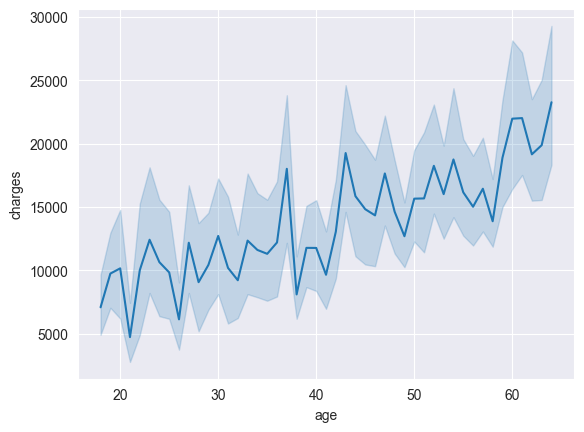

In [74]:
sns.lineplot(df[['age', 'charges']], x = 'age', y= 'charges')

<AxesSubplot: xlabel='sex', ylabel='charges'>

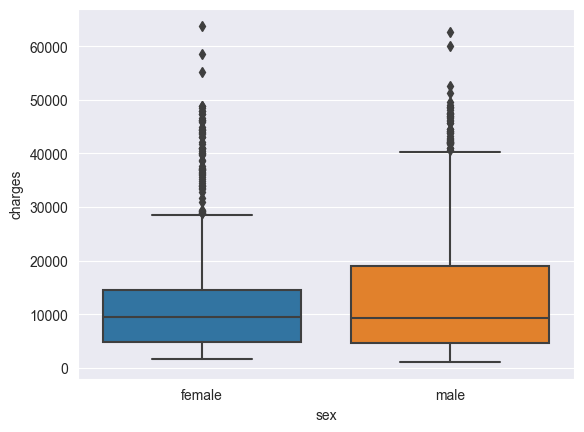

In [75]:
sns.boxplot(df, x = 'sex', y = 'charges')

<AxesSubplot: xlabel='age', ylabel='charges'>

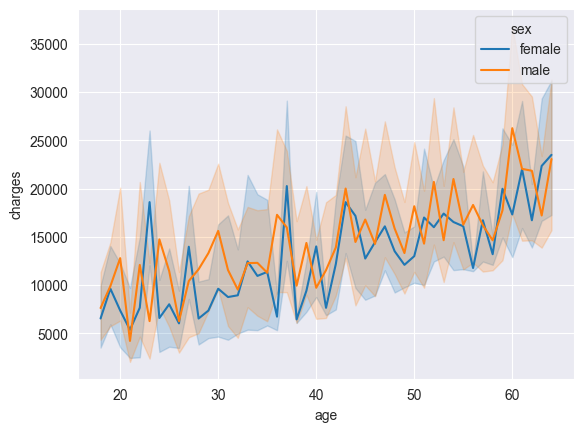

In [76]:
sns.lineplot(df, x = 'age', y= 'charges', hue = 'sex')

<AxesSubplot: xlabel='children', ylabel='charges'>

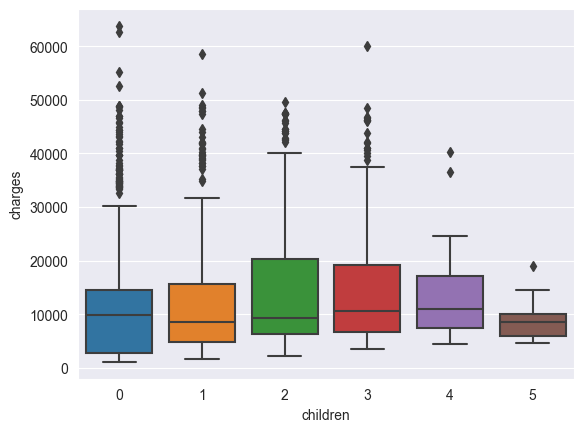

In [77]:
sns.boxplot(df, y= 'charges', x = 'children')

<AxesSubplot: xlabel='region', ylabel='charges'>

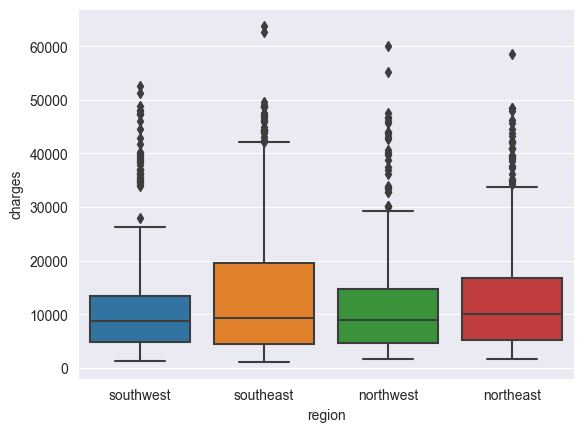

In [78]:
sns.boxplot(df, y= 'charges', x = 'region')

<AxesSubplot: xlabel='smoker', ylabel='charges'>

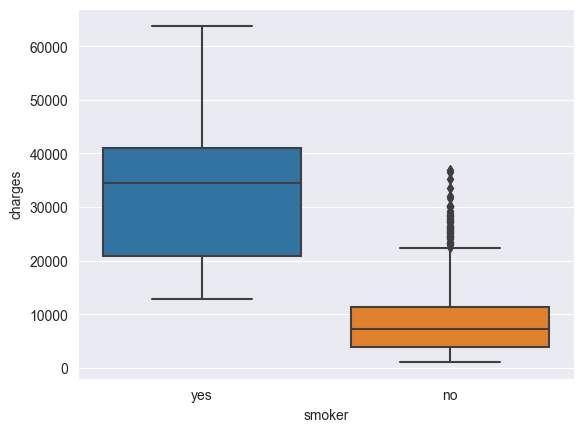

In [79]:
sns.boxplot(df, y= 'charges', x = 'smoker')

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/4014866372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<AxesSubplot: >

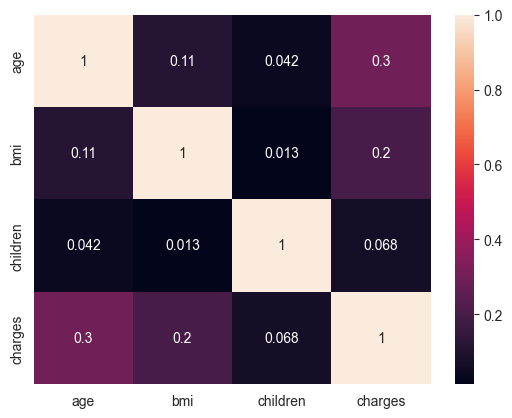

In [80]:
sns.heatmap(df.corr(), annot= True)

## Análise do impacto do fumo

In [81]:
df_fumante_true = df.loc[df.smoker == 'yes']
df_fumante_false = df.loc[df.smoker == 'no']

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/1986248362.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fumante_true.corr(), annot= True)


<AxesSubplot: >

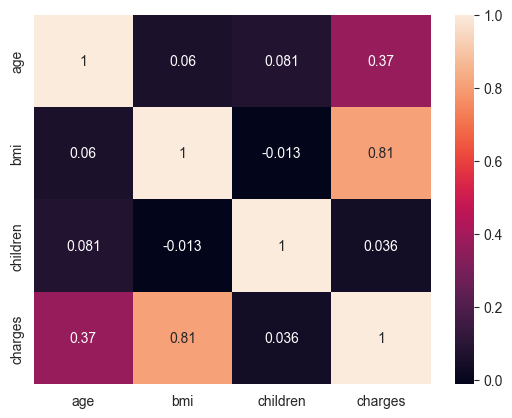

In [82]:
sns.heatmap(df_fumante_true.corr(), annot= True)

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/4248078798.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fumante_false.corr(), annot= True)


<AxesSubplot: >

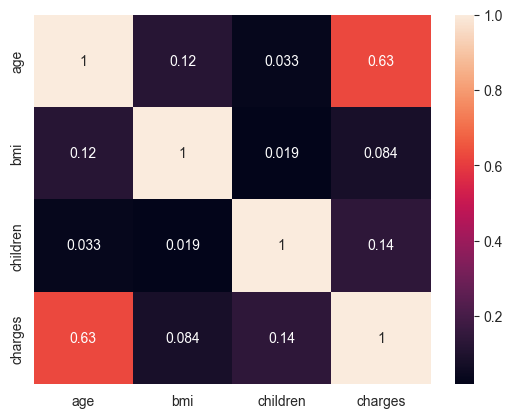

In [83]:
sns.heatmap(df_fumante_false.corr(), annot= True)

# Criação do modelo de regressão linear

In [84]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [85]:
X =  sm.add_constant(df_fumante_true[['age', 'bmi', 'children']])
y = df_fumante_true['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

y_train = np.array(y_train, dtype = 'float')
X_train = np.array(X_train)

mod = sm.OLS(y_train, X_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     178.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.45e-54
Time:                        11:20:28   Log-Likelihood:                -1933.9
No. Observations:                 191   AIC:                             3876.
Df Residuals:                     187   BIC:                             3889.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.22e+04   2446.147     -9.075      0.000    -2.7e+04   -1.74e+04
x1           279.6958     30.846      9.067      0.000     218.845     340.547
x2          1424.0317     68.497     20.790      0.000    1288.905    1559.158
x3           128.5436    392.847      0.327      0.744    -646.438     903.526
==============================================================================
Omnibus:                       46.673   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.696
Skew:                           1.101   Prob(JB):                     1.84e-23
Kurtosis:                       5.883   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X =  sm.add_constant(df_fumante_false[['age', 'bmi', 'children']])
y = df_fumante_false['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

y_train = np.array(y_train, dtype = 'float')
X_train = np.array(X_train)

mod = sm.OLS(y_train, X_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     166.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.85e-82
Time:                        11:20:28   Log-Likelihood:                -7363.6
No. Observations:                 744   AIC:                         1.474e+04
Df Residuals:                     740   BIC:                         1.475e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2860.2636    991.322     -2.885      0.004   -4806.402    -914.126
x1           269.4101     12.445     21.648      0.000     244.979     293.841
x2             4.0194     29.545      0.136      0.892     -53.982      62.021
x3           667.0720    154.365      4.321      0.000     364.026     970.118
==============================================================================
Omnibus:                      462.369   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2906.851
Skew:                           2.952   Prob(JB):                         0.00
Kurtosis:                      10.675   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
df.region = df.region.replace(to_replace = dict(zip(df.region.unique(), []))

<AxesSubplot: xlabel='region', ylabel='charges'>

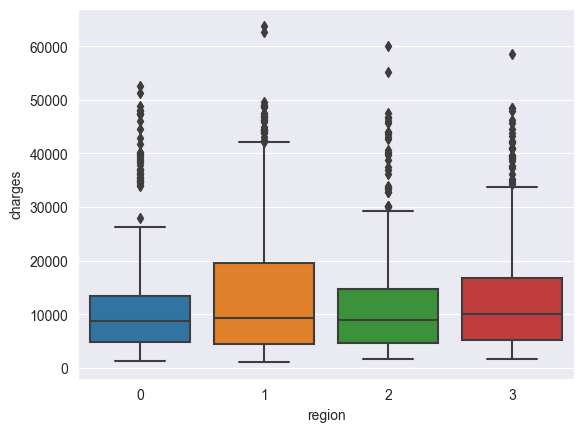

In [97]:
sns.boxplot(df, x = 'region', y = 'charges')

In [99]:
df.groupby('region').mean().sort_values('charges')

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/4119389699.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').mean().sort_values('charges')


,age,bmi,children,charges
region,,,,
0,39.455385,30.596615,1.141538,12346.937377
2,39.196923,29.199785,1.147692,12417.575374
3,39.268519,29.173503,1.046296,13406.384516
1,38.939560,33.355989,1.049451,14735.411438


In [101]:
df.region = df.region.replace(to_replace = dict(zip(df.region.unique(), [0,2,3,1])))

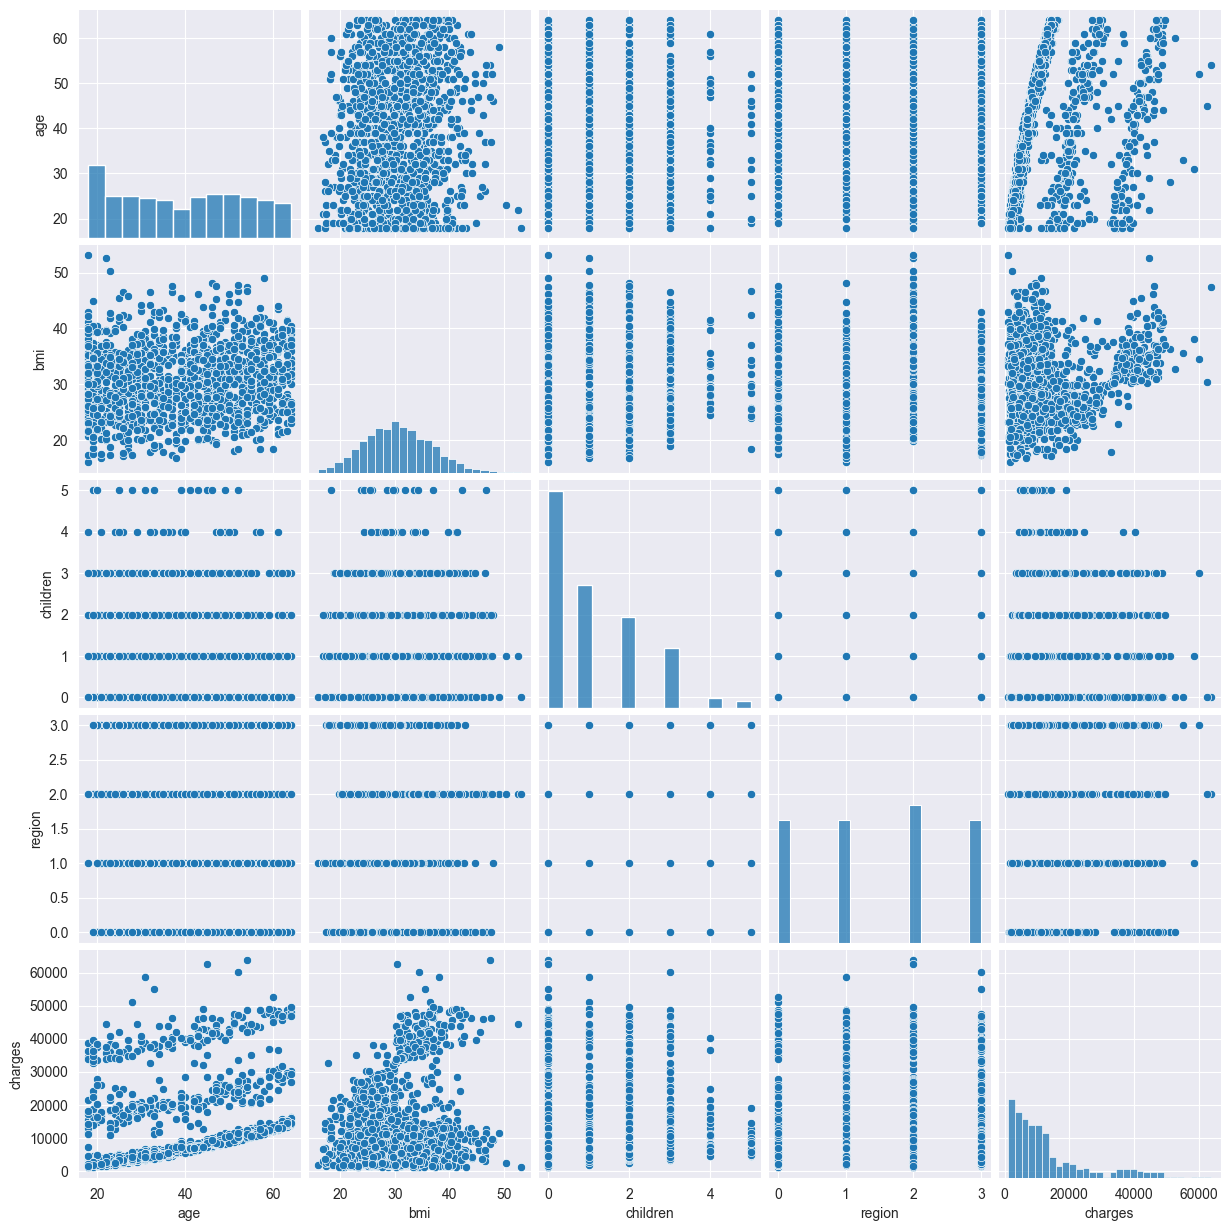

In [102]:
sns.pairplot(df)